In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [61]:
df_business_subarea = df.dropna(subset=['business_subarea'])

converted_counts_business_subarea = df_business_subarea.groupby('business_subarea')['is_converted'].sum().reset_index()
total_counts_business_subarea = df_business_subarea.groupby('business_subarea')['is_converted'].count().reset_index()

ratio_df_business_subarea = pd.merge(converted_counts_business_subarea, total_counts_business_subarea, on='business_subarea', how='left')
ratio_df_business_subarea['conversion_ratio'] = ratio_df_business_subarea['is_converted_x'] / ratio_df_business_subarea['is_converted_y']

for index, row in ratio_df_business_subarea.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['business_subarea']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

Advertising 별 is_converted 비율: 13.33%, 전체 갯수: 120, is_converted된 갯수: 16
Aerospace 별 is_converted 비율: 0.00%, 전체 갯수: 5, is_converted된 갯수: 0
Agriculture 별 is_converted 비율: 6.67%, 전체 갯수: 15, is_converted된 갯수: 1
Airline 별 is_converted 비율: 0.00%, 전체 갯수: 4, is_converted된 갯수: 0
Airport / Airfield / Helipad 별 is_converted 비율: 6.25%, 전체 갯수: 32, is_converted된 갯수: 2
Apartment 별 is_converted 비율: 6.13%, 전체 갯수: 163, is_converted된 갯수: 10
Banking 별 is_converted 비율: 6.25%, 전체 갯수: 16, is_converted된 갯수: 1
Bookstore 별 is_converted 비율: 0.00%, 전체 갯수: 11, is_converted된 갯수: 0
Botanical Garden / Green House 별 is_converted 비율: 0.00%, 전체 갯수: 9, is_converted된 갯수: 0
Broadcasting & Media 별 is_converted 비율: 35.90%, 전체 갯수: 39, is_converted된 갯수: 14
Bus Terminal 별 is_converted 비율: 0.00%, 전체 갯수: 5, is_converted된 갯수: 0
CVS (Convenience Store) 별 is_converted 비율: 100.00%, 전체 갯수: 2, is_converted된 갯수: 2
Car Dealership 별 is_converted 비율: 20.00%, 전체 갯수: 15, is_converted된 갯수: 3
Casino Resort 별 is_converted 비율: 100.00%, 전체 갯수: 1,

In [65]:
top10_business_subareas = ratio_df_business_subarea.sort_values(by='is_converted_y', ascending=False).head(10)
for index, row in top10_business_subareas.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['business_subarea']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

Others 별 is_converted 비율: 19.77%, 전체 갯수: 1740, is_converted된 갯수: 344
Other Stores 별 is_converted 비율: 9.64%, 전체 갯수: 280, is_converted된 갯수: 27
Hospital 별 is_converted 비율: 42.70%, 전체 갯수: 267, is_converted된 갯수: 114
Manufacturing Factory / Plant 별 is_converted 비율: 17.86%, 전체 갯수: 196, is_converted된 갯수: 35
Construction 별 is_converted 비율: 11.52%, 전체 갯수: 191, is_converted된 갯수: 22
Higher Education (College & University) 별 is_converted 비율: 15.59%, 전체 갯수: 186, is_converted된 갯수: 29
Engineering 별 is_converted 비율: 12.02%, 전체 갯수: 183, is_converted된 갯수: 22
Villa / Single-Family Home 별 is_converted 비율: 8.72%, 전체 갯수: 172, is_converted된 갯수: 15
Apartment 별 is_converted 비율: 6.13%, 전체 갯수: 163, is_converted된 갯수: 10
Electronics & Telco 별 is_converted 비율: 11.85%, 전체 갯수: 135, is_converted된 갯수: 16


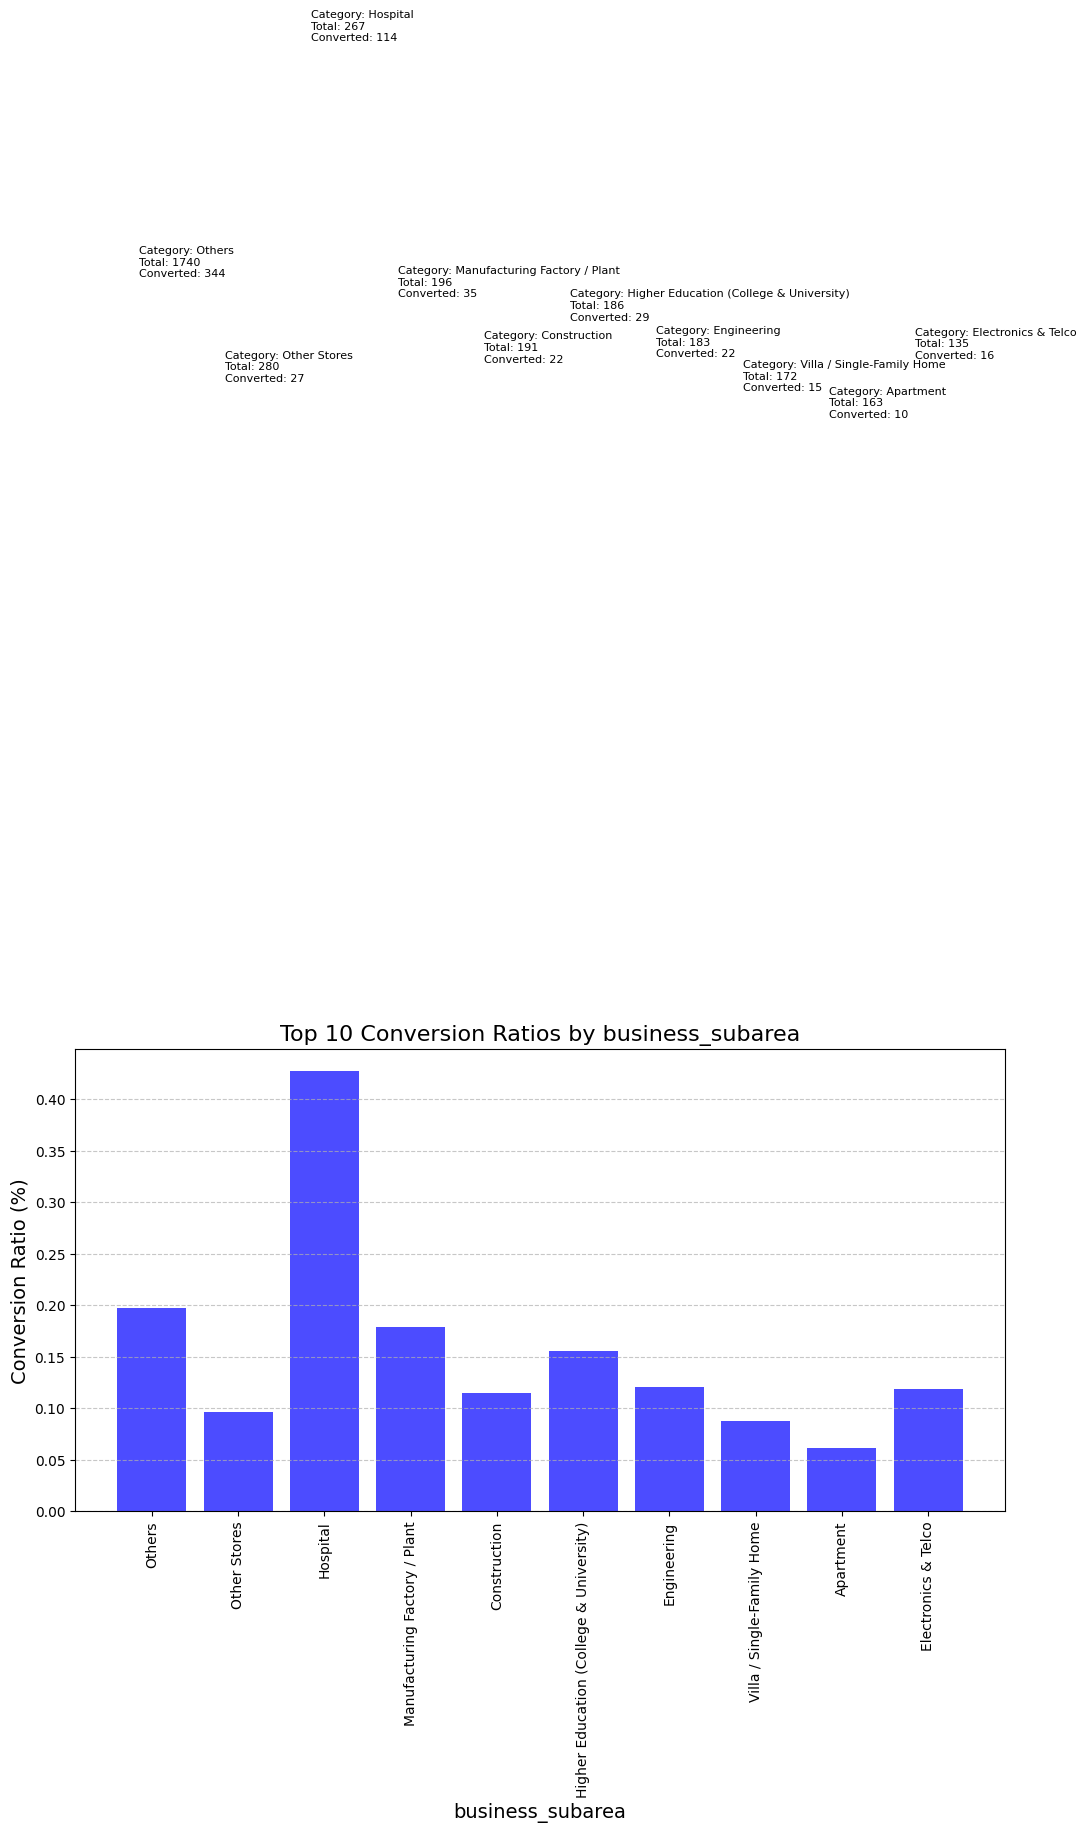

In [66]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_business_subareas['business_subarea'], top10_business_subareas['conversion_ratio'], color='blue', alpha=0.7)

for bar, total, converted, category in zip(bars, top10_business_subareas['is_converted_y'], top10_business_subareas['is_converted_x'], top10_business_subareas['business_subarea']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Category: {category}\nTotal: {total}\nConverted: {converted}', fontsize=8, color='black')

plt.title('Top 10 Conversion Ratios by business_subarea', fontsize=16)
plt.xlabel('business_subarea', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()